## Preliminary notebook needed to create RPC contour data.

In [1]:
#this contains functions rpc_est which computes an estimate rpc value 
#and RPC which computes RPC from formula in Siegert et al. paper
#run all to generate contour plot data from both funtions that save in .txt files

In [2]:
def rpc_est(ensemble, obs):
    from scipy.stats import pearsonr

    ens_mean = ensemble.mean(axis=0)
    ensmean_obs_corr = pearsonr(obs, ens_mean)[0]
    ens_mem_corrs = []

    for k in range(0,ensemble.shape[0]):
        mem = ensemble[k]
        ensmean_new = (np.delete(ensemble, k, axis=0)).mean(axis=0)
        ens_mem_corr = pearsonr(mem, ensmean_new)[0]
        ens_mem_corrs.append(ens_mem_corr)

    ensmean_mem_corr = np.mean(ens_mem_corrs).mean()
    rpc = ensmean_obs_corr/ensmean_mem_corr
    return rpc

In [3]:
#RPC estimate from generated data
import numpy as np

mu_x=20
mu_y=20
sigma2_s=50
sigma2_eps=50
alpha=np.logspace(-1,1,101)

sigma2_eta=alpha*sigma2_eps

beta=np.logspace(-1,1,101)

ens=51
time=1000
a=0
b=time
total=1000*51

s_t=np.zeros(time*101).reshape(time,101)
eps=np.zeros(time)
eta=np.zeros(51*time*101).reshape(51,time,101)
y_t=np.zeros(time)
x_t=np.zeros(51*time*101*101).reshape(51,time,101,101)

for i in range(51):
    for m in range(time):
        for p in range(101):
            eta[i,m,p]= np.random.normal(loc=0.0, scale=(sigma2_eta[p]**0.5), size=None)

for n in range(time):
    s_t[n] = np.random.normal(loc=0.0, scale=(sigma2_s**0.5), size=None)
    eps[n] = np.random.normal(loc=0.0, scale=sigma2_eps**0.5, size=None)
    y_t[n] = mu_y+s_t[n,0]+eps[n]
    for p in range(101):
        for q in range(101):
            x_t[:,n,q,p] = mu_x + beta[q]*s_t[n,0]+eta[:,n,p]

rpc_est(x_t[:,:,0,0],y_t)


2.387910207231476

In [4]:
RPC_est_data=np.zeros([101,101])
for i in range(101):
    for j in range(101):
        RPC_est_data[i,j]=rpc_est(x_t[:,:,i,j],y_t)

In [5]:
# save the RPC estimate data for the 4 panle contour plot
a_file = open("RPC_contour_data_est.txt", "w")
for row in RPC_est_data:
    np.savetxt(a_file, row)
a_file.close()

In [6]:
# the following contour plot uses to RPC formula from the Siegert et. al. paper
# values calculated in the RPC function

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.dpi = 300
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
#import proplot as pplt
plt.style.use('seaborn-white')
orig_cmap = matplotlib.cm.bwr

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. '''
    
    cdict = {'red': [],'green': [],'blue': [],'alpha': []}
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)
    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)
        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)
    return newcmap
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=5/18, name='shifted')

[[1.00000000e+00 1.04712855e+00 1.09647820e+00 ... 9.12010839e+01
  9.54992586e+01 1.00000000e+02]
 [9.54992586e-01 1.00000000e+00 1.04712855e+00 ... 8.70963590e+01
  9.12010839e+01 9.54992586e+01]
 [9.12010839e-01 9.54992586e-01 1.00000000e+00 ... 8.31763771e+01
  8.70963590e+01 9.12010839e+01]
 ...
 [1.09647820e-02 1.14815362e-02 1.20226443e-02 ... 1.00000000e+00
  1.04712855e+00 1.09647820e+00]
 [1.04712855e-02 1.09647820e-02 1.14815362e-02 ... 9.54992586e-01
  1.00000000e+00 1.04712855e+00]
 [1.00000000e-02 1.04712855e-02 1.09647820e-02 ... 9.12010839e-01
  9.54992586e-01 1.00000000e+00]]


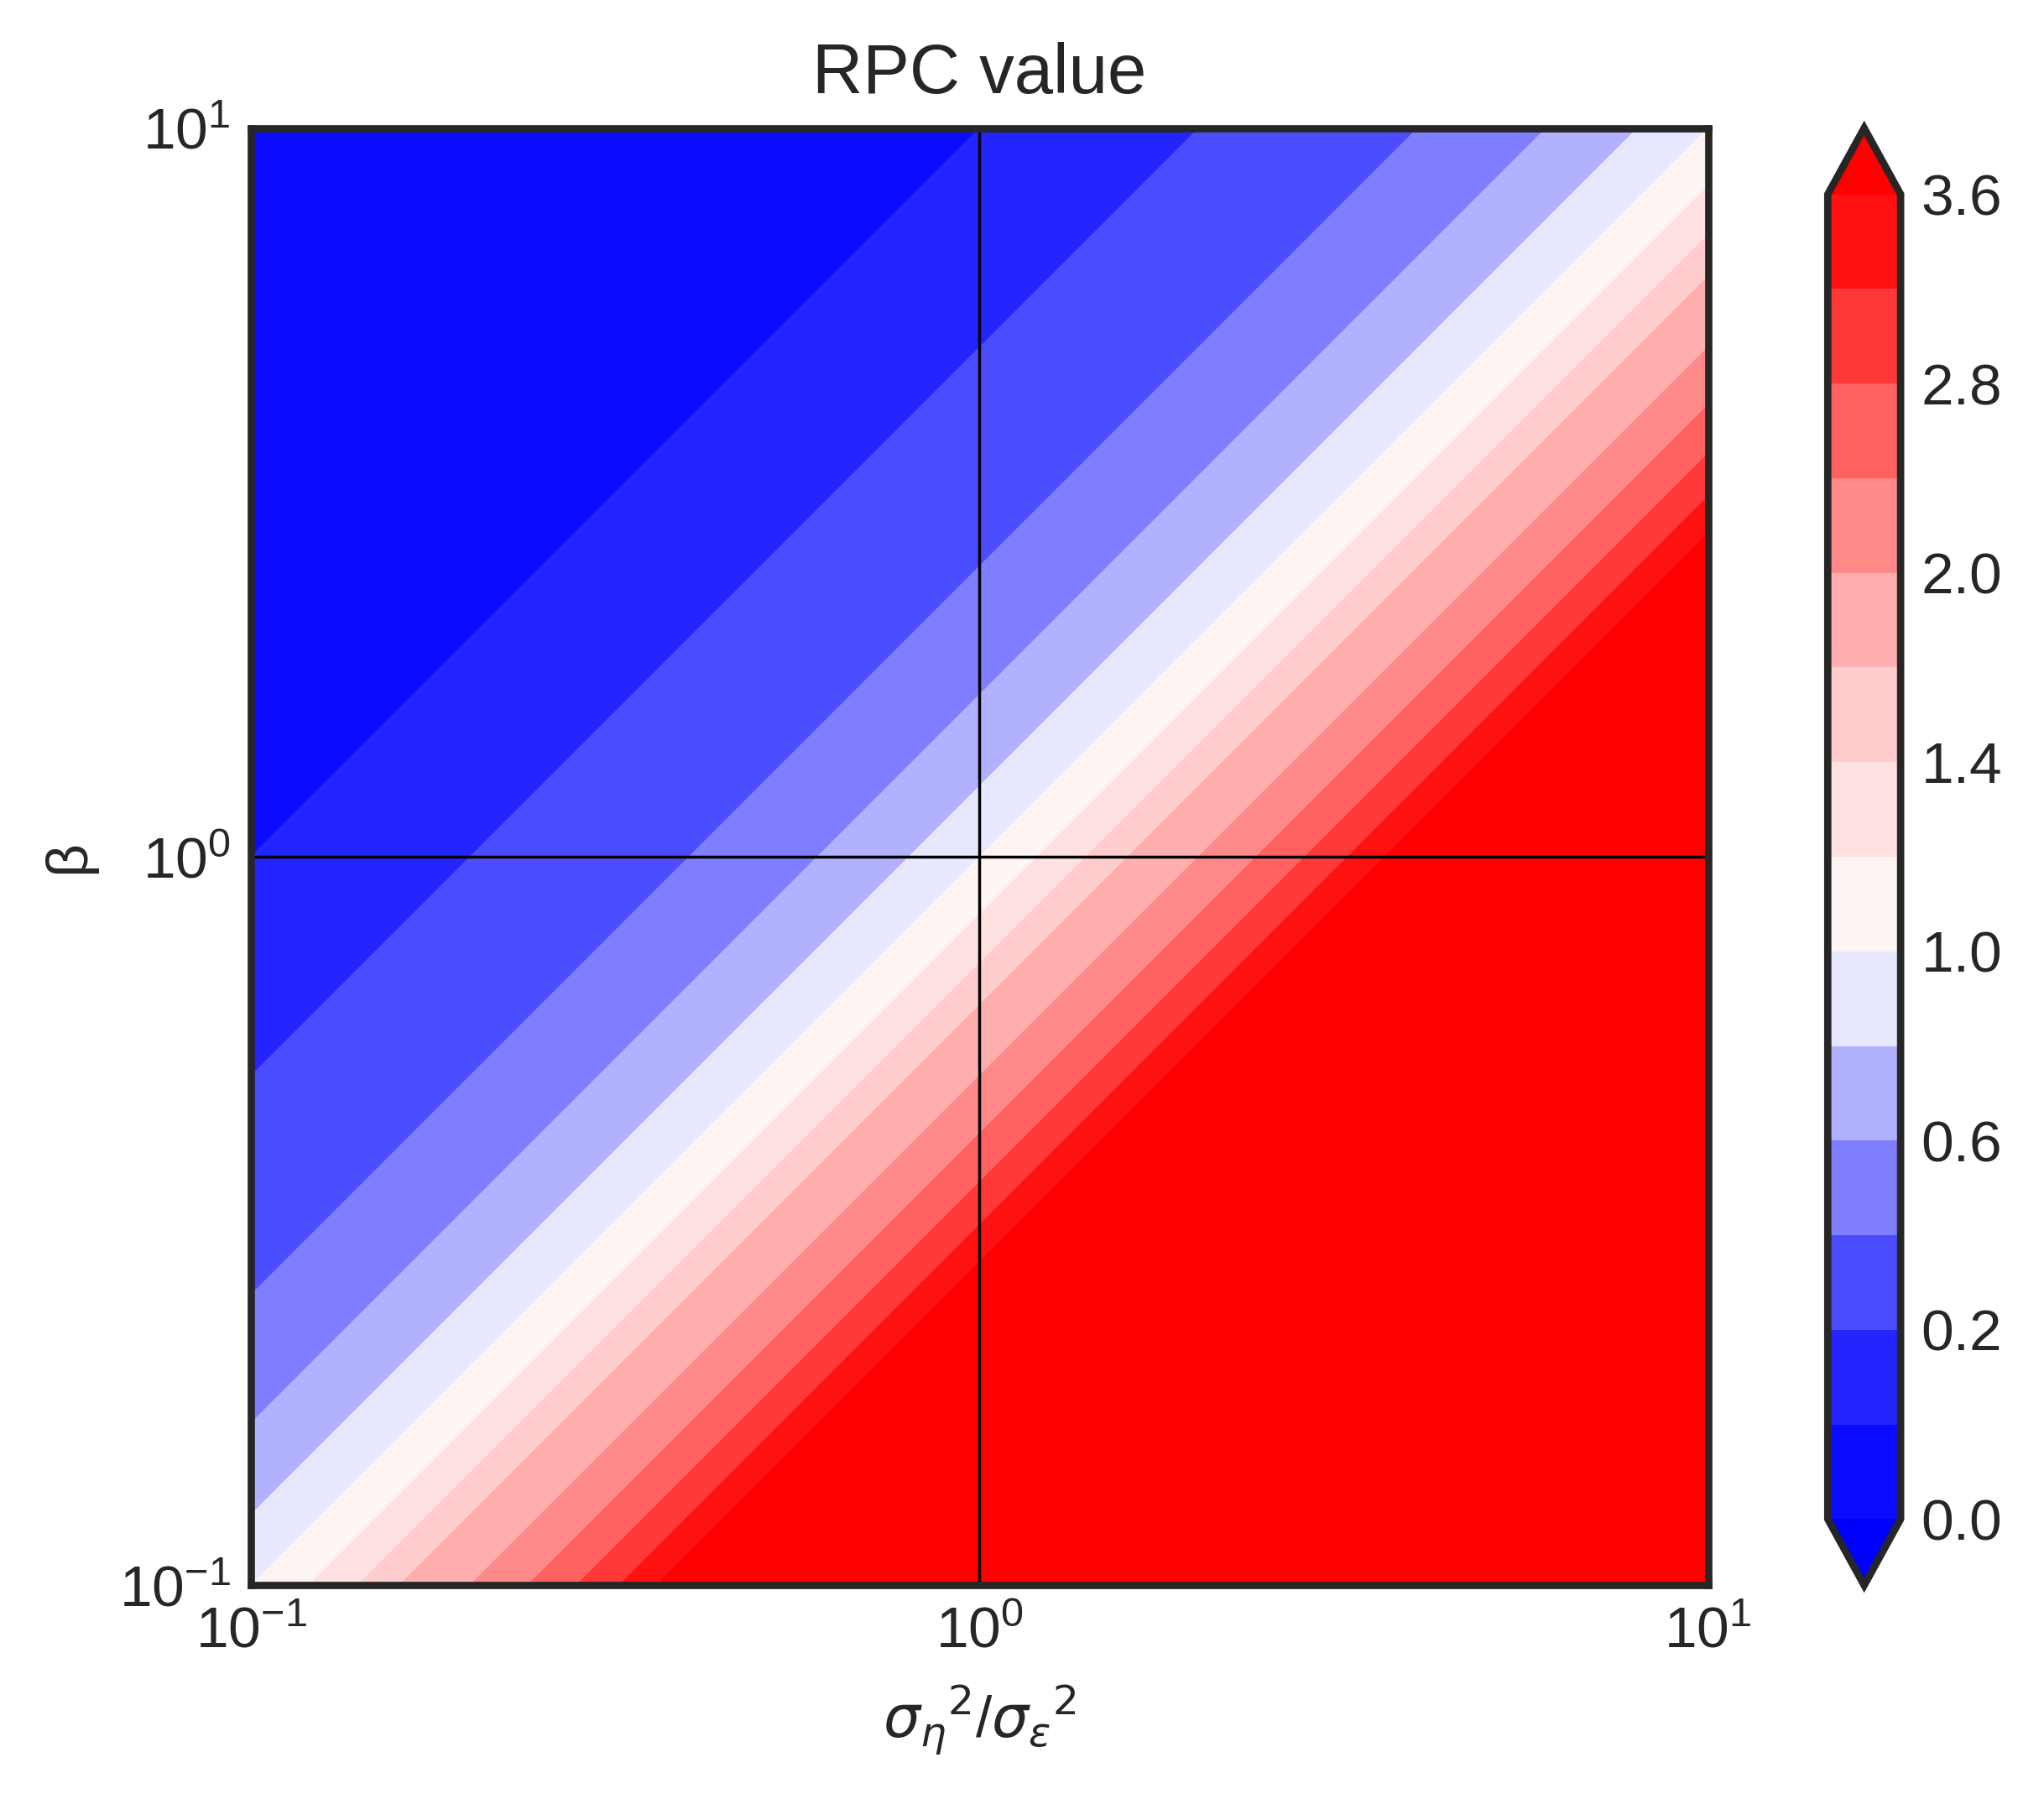

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

fig, axs = plt.subplots(1, dpi=500)
axs.set_aspect(1)

fig.tight_layout()
#plt.figure(figsize=(5, 5))

#sig_x actually refers to sigma^2 the variance
sig_eps=16
sig_s=50
R=51

beta = np.logspace(-1, 1, 101)
y = np.logspace(-1, 1, 101)

numerator=(1+y*sig_eps/((beta**2)*sig_s))**0.5
denom=((1+sig_eps/sig_s)*(1+y*sig_eps/(R*sig_s*(beta**2))))**0.5

def RPC(numerator, denom):
    return (numerator/denom)

X, Y = np.meshgrid( y, beta)
Z = RPC(X, Y)
print(Z)
level=[0,0.1,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,2,2.4,2.8,3.2,3.6]
c=axs.contourf(X, Y, Z, 20, levels=level, extend='both', cmap=shifted_cmap)

axs.set_xscale('log')
axs.set_yscale('log')
#plt.colorbar(); 
cbar = fig.colorbar(c)
axs.set_title("RPC value")
axs.set_ylabel("β")
axs.set_xlabel("$σ_{η}$$^2$/$σ_{ε}$$^2$")
axs.plot(y, np.ones(101), color='black', linewidth=0.5)
axs.plot(np.ones(101), beta, color='black', linewidth=0.5)

plt.show()